##  Análise Exploratória
🎯 Objetivo
Este notebook realiza uma análise exploratória inicial do conjunto de dados de clientes, com o objetivo de entender a distribuição das variáveis, verificar possíveis inconsistências e avaliar a necessidade de agrupamentos ou outras transformações para etapas futuras da análise.



In [1]:
# Bibliotecas de visualização e análise de dados
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Bibliotecas para análise do ambiente
from datetime import datetime
from platform import python_version

# Bibliotecas de machine learning
import sklearn

# Biblioteca para criação de relatórios automáticos
from ydata_profiling import ProfileReport

# Módulos locais do projeto
from src.helpers import inspect_outliers
from src.config import ORIGINAL_DATA, TREATED_DATA, REPORT
from src.graphics import PALETTE, pairplot

# Definindo o tema padrão do seaborn
sns.set_theme(palette="ocean")

# Exibir todas as colunas do DataFrame
pd.set_option('display.max_columns', None)

# Evita notação científica na exibição de floats
pd.set_option('display.float_format', lambda x: '%.2f' % x)


In [2]:
df = pd.read_csv(ORIGINAL_DATA, sep="\t")
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.00,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.00,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.00,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.00,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.00,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [3]:
df.tail()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2235,10870,1967,Graduation,Married,61223.00,0,1,13-06-2013,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.00,2,1,10-06-2014,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.00,0,0,25-01-2014,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.00,0,1,24-01-2014,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0
2239,9405,1954,PhD,Married,52869.00,1,1,15-10-2012,40,84,3,61,2,1,21,3,3,1,4,7,0,0,0,0,0,0,3,11,1


#### #Informações iniciais do Dataset

In [4]:
df.info()
#Verifica a estrutura dos dados, tipos de variáveis, e contagem de valores nulos.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [5]:
df.describe()
#Mostra média, desvio padrão, valores mínimos, máximos e quartis das colunas numéricas.

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.00,2240.00,2216.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00
mean,5592.16,1968.81,52247.25,0.44,0.51,49.11,303.94,26.30,166.95,37.53,27.06,44.02,2.33,4.08,2.66,5.79,5.32,0.07,0.07,0.07,0.06,0.01,0.01,3.00,11.00,0.15
std,3246.66,11.98,25173.08,0.54,0.54,28.96,336.60,39.77,225.72,54.63,41.28,52.17,1.93,2.78,2.92,3.25,2.43,0.26,0.26,0.26,0.25,0.11,0.10,0.00,0.00,0.36
min,0.00,1893.00,1730.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.00,11.00,0.00
25%,2828.25,1959.00,35303.00,0.00,0.00,24.00,23.75,1.00,16.00,3.00,1.00,9.00,1.00,2.00,0.00,3.00,3.00,0.00,0.00,0.00,0.00,0.00,0.00,3.00,11.00,0.00
50%,5458.50,1970.00,51381.50,0.00,0.00,49.00,173.50,8.00,67.00,12.00,8.00,24.00,2.00,4.00,2.00,5.00,6.00,0.00,0.00,0.00,0.00,0.00,0.00,3.00,11.00,0.00
75%,8427.75,1977.00,68522.00,1.00,1.00,74.00,504.25,33.00,232.00,50.00,33.00,56.00,3.00,6.00,4.00,8.00,7.00,0.00,0.00,0.00,0.00,0.00,0.00,3.00,11.00,0.00
max,11191.00,1996.00,666666.00,2.00,2.00,99.00,1493.00,199.00,1725.00,259.00,263.00,362.00,15.00,27.00,28.00,13.00,20.00,1.00,1.00,1.00,1.00,1.00,1.00,3.00,11.00,1.00


In [6]:
df.describe(exclude='number')
#Resumo das variáveis categóricas como Education, Marital_Status e Dt_Customer.

,Education,Marital_Status,Dt_Customer
count,2240,2240,2240
unique,5,8,663
top,Graduation,Married,31-08-2012
freq,1127,864,12


#### 🔎 Análise de Valores Categóricos

In [7]:
df['Z_Revenue'].value_counts()
# Verificação de colunas com valores únicos

Z_Revenue
11    2240
Name: count, dtype: int64

In [8]:
df['Z_CostContact'].value_counts()
# Verificação de colunas com valores únicos

Z_CostContact
3    2240
Name: count, dtype: int64

In [9]:
df['Education'].value_counts()
#Educação

Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64

In [10]:
df['Marital_Status'].value_counts()
#Estado Civil

Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

#### 🕒 Conversão de Coluna para Datetime
Facilita operações com datas, como cálculo de idade.

In [11]:
# Convertendo o ano de nascimento para datetime
df['Year_Birth'] = pd.to_datetime(df['Year_Birth'], format='%Y')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   datetime64[ns]
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   object        
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

In [12]:
# Converter coluna 'data' (formato dd-mm-yyyy) para datetime
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   datetime64[ns]
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

In [14]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957-01-01,Graduation,Single,58138.00,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954-01-01,Graduation,Single,46344.00,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965-01-01,Graduation,Together,71613.00,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984-01-01,Graduation,Together,26646.00,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981-01-01,PhD,Married,58293.00,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [15]:
#exibir apenas o ano

In [16]:
df['Year_Birth'] = df['Year_Birth'].dt.year
df.head()


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.00,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.00,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.00,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.00,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.00,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [17]:
#describe datetime
#formato datetime não é muito adequado para os modelos de machine learning, por isso vou criar novas colunas a partir deles
df['Year_Birth'].describe()

count   2240.00
mean    1968.81
std       11.98
min     1893.00
25%     1959.00
50%     1970.00
75%     1977.00
max     1996.00
Name: Year_Birth, dtype: float64

In [18]:
# Vou considerar a idade de acordo com o contexto da campanha (a realidade na época)

df['Age'] = df['Dt_Customer'].max().year - df['Year_Birth'] 
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
0,5524,1957,Graduation,Single,58138.00,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,57
1,2174,1954,Graduation,Single,46344.00,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,60
2,4141,1965,Graduation,Together,71613.00,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,49
3,6182,1984,Graduation,Together,26646.00,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,30
4,5324,1981,PhD,Married,58293.00,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,33


In [19]:
df['Age'].value_counts()

Age
38     89
43     87
39     83
42     79
36     77
44     77
41     74
49     74
45     71
40     69
58     55
56     53
35     53
62     52
37     52
46     51
55     51
48     50
60     50
59     49
54     49
32     45
51     45
47     44
52     44
57     43
63     43
31     42
28     42
50     42
34     39
33     39
30     38
53     36
61     35
29     32
25     30
65     30
64     29
26     29
27     27
66     21
24     18
68     16
67     16
23     15
22     13
69      8
71      7
70      7
21      5
19      5
20      3
18      2
115     1
73      1
121     1
114     1
74      1
Name: count, dtype: int64

In [20]:
#describe datetime
df['Dt_Customer'].describe()

count                             2240
mean     2013-07-10 10:01:42.857142784
min                2012-07-30 00:00:00
25%                2013-01-16 00:00:00
50%                2013-07-08 12:00:00
75%                2013-12-30 06:00:00
max                2014-06-29 00:00:00
Name: Dt_Customer, dtype: object

In [21]:
# Criando uma nova coluna com o tempo (em dias) desde o cadastro até a data da análise.
df = df.copy()  #para evitar SettingWithCopyWarning
df['Days_Since_Enrolled'] = df['Dt_Customer'].max() - df['Dt_Customer']
df['Days_Since_Enrolled'] = df['Days_Since_Enrolled'].dt.days #colocar no formato dias

In [22]:
#anos desde inscrição
df['Years_Since_Enrolled'] = df['Days_Since_Enrolled']// 365 #apenas o valor inteiro


In [23]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Days_Since_Enrolled,Years_Since_Enrolled
0,5524,1957,Graduation,Single,58138.00,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,57,663,1
1,2174,1954,Graduation,Single,46344.00,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,60,113,0
2,4141,1965,Graduation,Together,71613.00,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,49,312,0
3,6182,1984,Graduation,Together,26646.00,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,30,139,0
4,5324,1981,PhD,Married,58293.00,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,33,161,0


In [24]:
df['Age'].describe()

count   2240.00
mean      45.19
std       11.98
min       18.00
25%       37.00
50%       44.00
75%       55.00
max      121.00
Name: Age, dtype: float64

In [25]:
#agrupamento de acordo com a idade tentando manter um intervalo parecido entre elas
#grupos de idade
#adulto_jovem; 18-30
#adulto: 31-45
#adulto_senior: 46-60
#idoso: +61
# Definir os bins e labels
bins = [18, 30, 45, 60, df['Age'].max()]  # Limites dos grupos 
#parâmetro à esquerda está incluso

labels = ['18-30', '31-45', '46-60', '+60']  # Nomes dos grupos

# Criar a nova coluna
df['Age_Grouped'] = pd.cut(
   df['Age'],
    bins=bins,
    labels=labels,
    include_lowest=True, #para o 18 ser incluído
)

# Verificar a contagem
df['Age_Grouped'].value_counts()

Age_Grouped
31-45    976
46-60    736
+60      269
18-30    259
Name: count, dtype: int64

In [26]:
#a maior parte dos clientes tem mais de 31 anos

#### Análise de valores nulos

In [27]:
df.isnull().sum()

ID                       0
Year_Birth               0
Education                0
Marital_Status           0
Income                  24
Kidhome                  0
Teenhome                 0
Dt_Customer              0
Recency                  0
MntWines                 0
MntFruits                0
MntMeatProducts          0
MntFishProducts          0
MntSweetProducts         0
MntGoldProds             0
NumDealsPurchases        0
NumWebPurchases          0
NumCatalogPurchases      0
NumStorePurchases        0
NumWebVisitsMonth        0
AcceptedCmp3             0
AcceptedCmp4             0
AcceptedCmp5             0
AcceptedCmp1             0
AcceptedCmp2             0
Complain                 0
Z_CostContact            0
Z_Revenue                0
Response                 0
Age                      0
Days_Since_Enrolled      0
Years_Since_Enrolled     0
Age_Grouped              0
dtype: int64

In [28]:
df[df['Income'].isnull()]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Days_Since_Enrolled,Years_Since_Enrolled,Age_Grouped
10,1994,1983,Graduation,Married,NaN,1,0,2013-11-15,11,5,5,6,0,2,1,1,1,0,2,7,0,0,0,0,0,0,3,11,0,31,226,0,31-45
27,5255,1986,Graduation,Single,NaN,1,0,2013-02-20,19,5,1,3,3,263,362,0,27,0,0,1,0,0,0,0,0,0,3,11,0,28,494,1,18-30
43,7281,1959,PhD,Single,NaN,0,0,2013-11-05,80,81,11,50,3,2,39,1,1,3,4,2,0,0,0,0,0,0,3,11,0,55,236,0,46-60
48,7244,1951,Graduation,Single,NaN,2,1,2014-01-01,96,48,5,48,6,10,7,3,2,1,4,6,0,0,0,0,0,0,3,11,0,63,179,0,+60
58,8557,1982,Graduation,Single,NaN,1,0,2013-06-17,57,11,3,22,2,2,6,2,2,0,3,6,0,0,0,0,0,0,3,11,0,32,377,1,31-45
71,10629,1973,2n Cycle,Married,NaN,1,0,2012-09-14,25,25,3,43,17,4,17,3,3,0,3,8,0,0,0,0,0,0,3,11,0,41,653,1,31-45
90,8996,1957,PhD,Married,NaN,2,1,2012-11-19,4,230,42,192,49,37,53,12,7,2,8,9,0,0,0,0,0,0,3,11,0,57,587,1,46-60
91,9235,1957,Graduation,Single,NaN,1,1,2014-05-27,45,7,0,8,2,0,1,1,1,0,2,7,0,0,0,0,0,0,3,11,0,57,33,0,46-60
92,5798,1973,Master,Together,NaN,0,0,2013-11-23,87,445,37,359,98,28,18,1,2,4,8,1,0,0,0,0,0,0,3,11,0,41,218,0,31-45
128,8268,1961,PhD,Married,NaN,0,1,2013-07-11,23,352,0,27,10,0,15,3,6,1,7,6,0,0,0,0,0,0,3,11,0,53,353,0,46-60


#### Tratamento dos valores nulos.

Opções: 

    * Eliminar as linhas    
    * Preencher com medianas (menos sensíveis a outliers)
Como são apenas 24 linhas, númro não significativo para o modelo, optei por retirá-las

In [29]:
#retira valores nulos
df = df.dropna()

In [30]:
df[df.duplicated("ID")]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Days_Since_Enrolled,Years_Since_Enrolled,Age_Grouped


In [31]:
#analisar colunas mnt (gastos) e os produtos gold
colunas_mnt = [ coluna for coluna in df.filter(like='Mnt').columns]
df.loc[:,colunas_mnt]

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
0,635,88,546,172,88,88
1,11,1,6,2,1,6
2,426,49,127,111,21,42
3,11,4,20,10,3,5
4,173,43,118,46,27,15
...,...,...,...,...,...,...
2235,709,43,182,42,118,247
2236,406,0,30,0,0,8
2237,908,48,217,32,12,24
2238,428,30,214,80,30,61


In [32]:
#criar a coluna gastos totais
df= df.copy() 
df['Mnt_Total']=(
    df['MntWines']
    + df['MntFruits']
    + df['MntMeatProducts']
    + df['MntFishProducts']
    + df['MntSweetProducts']
    + df['MntGoldProds']
)


In [33]:
#diferenciar produtos gold de produtos regulares
df['Mnt_Regular']= df['Mnt_Total']- df['MntGoldProds']
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Days_Since_Enrolled,Years_Since_Enrolled,Age_Grouped,Mnt_Total,Mnt_Regular
0,5524,1957,Graduation,Single,58138.00,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,57,663,1,46-60,1617,1529
1,2174,1954,Graduation,Single,46344.00,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,60,113,0,46-60,27,21
2,4141,1965,Graduation,Together,71613.00,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,49,312,0,46-60,776,734
3,6182,1984,Graduation,Together,26646.00,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,30,139,0,18-30,53,48
4,5324,1981,PhD,Married,58293.00,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,33,161,0,31-45,422,407


In [34]:
#criar uma coluna que unifique a quantidade de filhos menores de idade
df['Children'] = df['Kidhome'] + df['Teenhome']
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Days_Since_Enrolled,Years_Since_Enrolled,Age_Grouped,Mnt_Total,Mnt_Regular,Children
0,5524,1957,Graduation,Single,58138.00,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,57,663,1,46-60,1617,1529,0
1,2174,1954,Graduation,Single,46344.00,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,60,113,0,46-60,27,21,2
2,4141,1965,Graduation,Together,71613.00,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,49,312,0,46-60,776,734,0
3,6182,1984,Graduation,Together,26646.00,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,30,139,0,18-30,53,48,1
4,5324,1981,PhD,Married,58293.00,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,33,161,0,31-45,422,407,1


In [35]:
#criar uma coluna flag - que indique a existência de filhos menores
df['Has_Children'] = df['Children'].apply(lambda x: 1 if x> 0 else 0) 
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Days_Since_Enrolled,Years_Since_Enrolled,Age_Grouped,Mnt_Total,Mnt_Regular,Children,Has_Children
0,5524,1957,Graduation,Single,58138.00,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,57,663,1,46-60,1617,1529,0,0
1,2174,1954,Graduation,Single,46344.00,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,60,113,0,46-60,27,21,2,1
2,4141,1965,Graduation,Together,71613.00,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,49,312,0,46-60,776,734,0,0
3,6182,1984,Graduation,Together,26646.00,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,30,139,0,18-30,53,48,1,1
4,5324,1981,PhD,Married,58293.00,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,33,161,0,31-45,422,407,1,1


In [36]:
df['Has_Children'].value_counts()

Has_Children
1    1583
0     633
Name: count, dtype: int64

In [37]:
#analisar estado civil
df['Marital_Status'].unique()	

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [38]:
#agrupar/ simplificar as categrorias df['Marital_Status']
marital_status= {
    
    'Single': 'Single',
    'Together': 'Partner',
    'Married': 'Partner',
    'Divorced': 'Single',
    'Widow': 'Single',
    'Alone': 'Single',
    'Absurd': 'Single',
    'YOLO':  'Single',
}

df['Marital_Status'] = df['Marital_Status'].map(marital_status) 
df['Marital_Status'].value_counts()


Marital_Status
Partner    1430
Single      786
Name: count, dtype: int64

In [39]:
#analisar Educação
df['Education'].value_counts() 	

Education
Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: count, dtype: int64

In [40]:
#não há informação sobre o país de origem para determinar o que é 2nd cicle
#na Europa pode estar relacionado ao Mestrado, por isso não vou simplificar as categorias

In [41]:
#conhecer reação às campanhas
#somar as colunas campanhas para analisar a reação a todas elas

df['AcceptedCmpTotal'] = (
    df['AcceptedCmp1'] + 
    df['AcceptedCmp2'] + 
    df['AcceptedCmp3'] + 
    df['AcceptedCmp4'] + 
    df['AcceptedCmp5']
)
df['AcceptedCmpTotal'].value_counts()

AcceptedCmpTotal
0    1757
1     323
2      81
3      44
4      11
Name: count, dtype: int64

In [42]:
#criar uma coluna flag para campanhas
#criar uma coluna flag - que indique a existência de filhos menores
df['HasAcceptedCmp'] = df['AcceptedCmpTotal'].apply(lambda x: 1 if x> 0 else 0) 
df['HasAcceptedCmp'].value_counts()

HasAcceptedCmp
0    1757
1     459
Name: count, dtype: int64

In [43]:
#analisar colunas mnt e os produtos gold
colunas_num = [ coluna for coluna in df.filter(like='Num').columns]
df.loc[:,colunas_num]


,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
0,3,8,10,4,7
1,2,1,1,2,5
2,1,8,2,10,4
3,2,2,0,4,6
4,5,5,3,6,5
...,...,...,...,...,...
2235,2,9,3,4,5
2236,7,8,2,5,7
2237,1,2,3,13,6
2238,2,6,5,10,3


In [44]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Days_Since_Enrolled', 'Years_Since_Enrolled', 'Age_Grouped',
       'Mnt_Total', 'Mnt_Regular', 'Children', 'Has_Children',
       'AcceptedCmpTotal', 'HasAcceptedCmp'],
      dtype='object')

In [45]:
#análise coluna target
df['Response'].value_counts()

Response
0    1883
1     333
Name: count, dtype: int64

#### Análise dos outliers

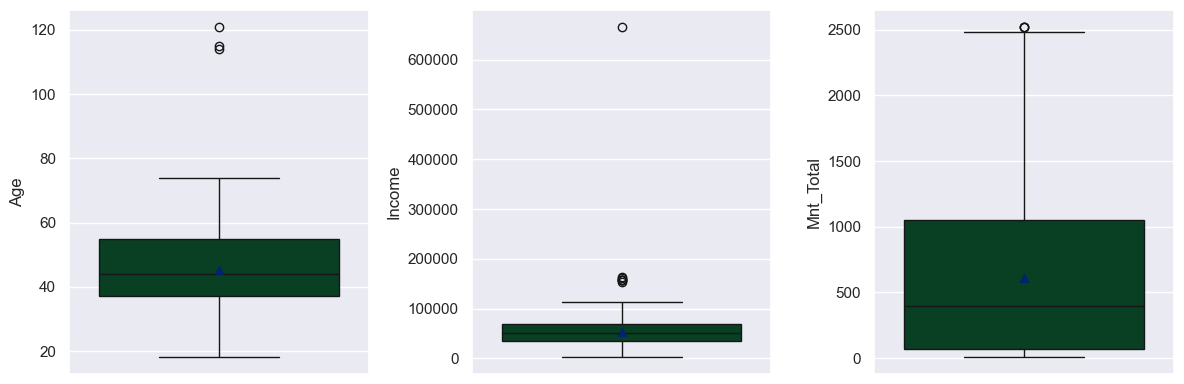

In [46]:
#analisar outliers e valores anômalos de acordo com as informações do relatório: idade, renda, valores gastos
#o agrupamento dos dados facilita essa análise
#avaliar em relação a coluna target

search_outliers = ['Age', 'Income', 'Mnt_Total']

fig, axs = plt.subplots(1, 3 , figsize=(12,4))

for ax, coluna in zip(axs.flatten(), search_outliers):
    sns.boxplot(data = df, ax=ax, y=coluna, showmeans=True)
    
plt.tight_layout()
plt.show()

In [47]:
inspect_outliers(df, 'Age')

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Days_Since_Enrolled,Years_Since_Enrolled,Age_Grouped,Mnt_Total,Mnt_Regular,Children,Has_Children,AcceptedCmpTotal,HasAcceptedCmp
192,7829,1900,2n Cycle,Single,36640.00,1,0,2013-09-26,99,15,6,8,7,4,25,1,2,1,2,5,0,0,0,0,0,1,3,11,0,114,276,0,+60,65,40,1,1,0,0
239,11004,1893,2n Cycle,Single,60182.00,0,1,2014-05-17,23,8,0,5,7,0,2,1,1,0,2,4,0,0,0,0,0,0,3,11,0,121,43,0,+60,22,20,1,1,0,0
339,1150,1899,PhD,Partner,83532.00,0,0,2013-09-26,36,755,144,562,104,64,224,1,4,6,4,1,0,0,1,0,0,0,3,11,0,115,276,0,+60,1853,1629,0,0,1,1


In [48]:
# parece haver um erro na idade, como são poucos registros vou excluir essas linhas
df = df.drop(inspect_outliers(df, 'Age').index)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2213 entries, 0 to 2239
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   ID                    2213 non-null   int64         
 1   Year_Birth            2213 non-null   int32         
 2   Education             2213 non-null   object        
 3   Marital_Status        2213 non-null   object        
 4   Income                2213 non-null   float64       
 5   Kidhome               2213 non-null   int64         
 6   Teenhome              2213 non-null   int64         
 7   Dt_Customer           2213 non-null   datetime64[ns]
 8   Recency               2213 non-null   int64         
 9   MntWines              2213 non-null   int64         
 10  MntFruits             2213 non-null   int64         
 11  MntMeatProducts       2213 non-null   int64         
 12  MntFishProducts       2213 non-null   int64         
 13  MntSweetProducts      2

In [49]:
inspect_outliers(df, 'Income')

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Days_Since_Enrolled,Years_Since_Enrolled,Age_Grouped,Mnt_Total,Mnt_Regular,Children,Has_Children,AcceptedCmpTotal,HasAcceptedCmp
164,8475,1973,PhD,Partner,157243.00,0,1,2014-03-01,98,20,2,1582,1,2,1,15,0,22,0,0,0,0,0,0,0,0,3,11,0,41,120,0,31-45,1608,1607,1,1,0,0
617,1503,1976,PhD,Partner,162397.00,1,1,2013-06-03,31,85,1,16,2,1,2,0,0,0,1,1,0,0,0,0,0,0,3,11,0,38,391,1,31-45,107,105,2,1,0,0
655,5555,1975,Graduation,Single,153924.00,0,0,2014-02-07,81,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,3,11,0,39,142,0,31-45,6,5,0,0,0,0
687,1501,1982,PhD,Partner,160803.00,0,0,2012-08-04,21,55,16,1622,17,3,4,15,0,28,1,0,0,0,0,0,0,0,3,11,0,32,694,1,31-45,1717,1713,0,0,0,0
1300,5336,1971,Master,Partner,157733.00,1,0,2013-06-04,37,39,1,9,2,0,8,0,1,0,1,1,0,0,0,0,0,0,3,11,0,43,390,1,31-45,59,51,1,1,0,0
1653,4931,1977,Graduation,Partner,157146.00,0,0,2013-04-29,13,1,0,1725,2,1,1,0,0,28,0,1,0,0,0,0,0,0,3,11,0,37,426,1,31-45,1730,1729,0,0,0,0
2132,11181,1949,PhD,Partner,156924.00,0,0,2013-08-29,85,2,1,2,1,1,1,0,0,0,0,0,0,0,0,0,0,0,3,11,0,65,304,0,+60,8,7,0,0,0,0
2233,9432,1977,Graduation,Partner,666666.00,1,0,2013-06-02,23,9,14,18,8,1,12,4,3,1,3,6,0,0,0,0,0,0,3,11,0,37,392,1,31-45,62,50,1,1,0,0


In [50]:
#há uma grande diferença dos demais outliers para o último registro.

#Não parece um dado real

df = df.drop(2233, axis=0)

In [51]:
inspect_outliers(df, 'Income')

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Days_Since_Enrolled,Years_Since_Enrolled,Age_Grouped,Mnt_Total,Mnt_Regular,Children,Has_Children,AcceptedCmpTotal,HasAcceptedCmp
164,8475,1973,PhD,Partner,157243.00,0,1,2014-03-01,98,20,2,1582,1,2,1,15,0,22,0,0,0,0,0,0,0,0,3,11,0,41,120,0,31-45,1608,1607,1,1,0,0
617,1503,1976,PhD,Partner,162397.00,1,1,2013-06-03,31,85,1,16,2,1,2,0,0,0,1,1,0,0,0,0,0,0,3,11,0,38,391,1,31-45,107,105,2,1,0,0
655,5555,1975,Graduation,Single,153924.00,0,0,2014-02-07,81,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,3,11,0,39,142,0,31-45,6,5,0,0,0,0
687,1501,1982,PhD,Partner,160803.00,0,0,2012-08-04,21,55,16,1622,17,3,4,15,0,28,1,0,0,0,0,0,0,0,3,11,0,32,694,1,31-45,1717,1713,0,0,0,0
1300,5336,1971,Master,Partner,157733.00,1,0,2013-06-04,37,39,1,9,2,0,8,0,1,0,1,1,0,0,0,0,0,0,3,11,0,43,390,1,31-45,59,51,1,1,0,0
1653,4931,1977,Graduation,Partner,157146.00,0,0,2013-04-29,13,1,0,1725,2,1,1,0,0,28,0,1,0,0,0,0,0,0,3,11,0,37,426,1,31-45,1730,1729,0,0,0,0
2132,11181,1949,PhD,Partner,156924.00,0,0,2013-08-29,85,2,1,2,1,1,1,0,0,0,0,0,0,0,0,0,0,0,3,11,0,65,304,0,+60,8,7,0,0,0,0


In [52]:
inspect_outliers(df, 'Mnt_Total')

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Days_Since_Enrolled,Years_Since_Enrolled,Age_Grouped,Mnt_Total,Mnt_Regular,Children,Has_Children,AcceptedCmpTotal,HasAcceptedCmp
1179,5735,1991,Master,Single,90638.00,0,0,2014-02-13,29,1156,120,915,94,144,96,1,3,4,10,1,0,0,1,0,0,0,3,11,0,23,136,0,18-30,2525,2429,0,0,1,1
1492,1763,1988,Graduation,Partner,87679.00,0,0,2013-07-27,62,1259,172,815,97,148,33,1,7,11,10,4,1,0,1,1,0,0,3,11,1,26,337,0,18-30,2524,2491,0,0,3,1
1572,5350,1991,Master,Single,90638.00,0,0,2014-02-13,29,1156,120,915,94,144,96,1,3,4,10,1,0,0,1,0,0,0,3,11,1,23,136,0,18-30,2525,2429,0,0,1,1


In [53]:
#observando os boxplots, nota-se que os oulieres estão bem próximos do limite.
#serão mantidos

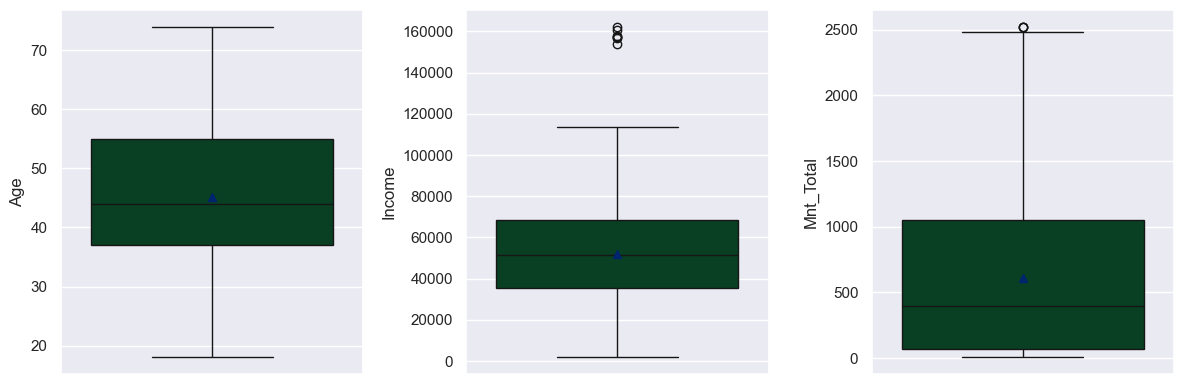

In [54]:
#analisar outliers e valores anômalos de acordo com as informações do relatório: idade, renda, valores gastos
#o agrupamento dos dados facilita essa análise
#avaliar em relação a coluna target

search_outliers = ['Age', 'Income', 'Mnt_Total']

fig, axs = plt.subplots(1, 3 , figsize=(12,4))

for ax, coluna in zip(axs.flatten(), search_outliers):
    sns.boxplot(data = df, ax=ax, y=coluna, showmeans=True)
    
plt.tight_layout()
plt.show()

#### Tratamento de colunas irrelevantes ou constantes

In [55]:
#excluir as colunas que não agregam informação ao modelo, ou que foram substitídas por formatos mais próprios para o modelo
colunas_dropar =[
    "ID", 
    'Z_Revenue', 
    'Z_CostContact', 
    'Dt_Customer', 
    'Year_Birth',
]
df = df.drop(columns=colunas_dropar)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2212 entries, 0 to 2239
Data columns (total 34 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Education             2212 non-null   object  
 1   Marital_Status        2212 non-null   object  
 2   Income                2212 non-null   float64 
 3   Kidhome               2212 non-null   int64   
 4   Teenhome              2212 non-null   int64   
 5   Recency               2212 non-null   int64   
 6   MntWines              2212 non-null   int64   
 7   MntFruits             2212 non-null   int64   
 8   MntMeatProducts       2212 non-null   int64   
 9   MntFishProducts       2212 non-null   int64   
 10  MntSweetProducts      2212 non-null   int64   
 11  MntGoldProds          2212 non-null   int64   
 12  NumDealsPurchases     2212 non-null   int64   
 13  NumWebPurchases       2212 non-null   int64   
 14  NumCatalogPurchases   2212 non-null   int64   
 15  NumStoreP

In [56]:
df.to_parquet(TREATED_DATA, index=False)

## Conclusão parcial

 O notebook permitiu obter uma visão geral dos dados, identificar colunas constantes, valores nulos e outliers.
 As colunas foram enriquecidas com novas variáveis como idade, gasto total e tempo de fidelidade.
 O próximo passo é preparar os dados para segmentação ou modelagem preditiva.